<a href="https://colab.research.google.com/github/santfloyd/Digital-Humanities/blob/master/PR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRÁCTICA. REDES NEURONALES CONVOLUCIONALES CON KERAS**



---



**EJERCICIO 1.** En este primer ejercicio entrenaremos y evaluaremos una primera red neuronal convolucional empleando el dataset facilitado con los recortes de las ortoimágenes aéreas para la clasificación de cultivos. El objetivo es entrenar y evaluar un modelo desde cero para la clasificación de tipos de cultivo.

El código presentado a continuación y que debe ser completado por el alumno se estructura de la siguiente manera:


*   Función que define la arquitectura del modelo a partir de unos parámetros facilitados y devuelve un objeto de la clase Model.
*   Función que recibe un dataset de datos conteniendo los valores de las imágenes y sus respectivas etiquetas (clases), y normaliza los valores de las imágenes dividiéndolos entre 255.
*   Lectura de los datos de entrenamiento, validación y test.
*   Normalización de los datos cargados.
*   Creación del objeto Model a través de la función deep_CNN creada.
*   Compilación del modelo.
*   Entrenamiento del modelo a partir de los datos normalizados.
*   Evaluación del modelo a partir del dataset de test. De este dataset se extrae la clase real y la clase estimada según el modelo para obtener los indicadores de evaluación.
*   Gráficas mostrando la evolución del entrenamiento y validación del modelo.

El modelo a crear deberá mantener la siguiente arquitectura:

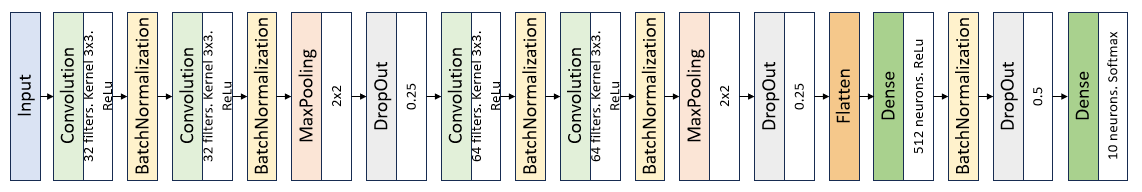



Mounted at /content/drive
Found 4970 files belonging to 5 classes.
Using 3976 files for training.
Found 4970 files belonging to 5 classes.
Using 994 files for validation.
Found 1500 files belonging to 5 classes.
[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/5
125/125 [==============================] - 871s 6s/step - loss: 1.1688 - accuracy: 0.6502 - val_loss: 1.9632 - val_accuracy: 0.2465
Epoch 2/5
125/125 [==============================] - 8s 61ms/step - loss: 0.6522 - accuracy: 0.7895 - val_loss: 2.8647 - val_accuracy: 0.4527
Epoch 3/5
125/125 [==============================] - 6s 49ms/step - loss: 0.5087 - accuracy: 0.8395 - val_loss: 2.3101 - val_accuracy: 0.4245
Epoch 4/5
125/125 [==============================] - 7s 52ms/step - loss: 0.4029 - accuracy: 0.8637 - val_loss: 2.2121 - val_accuracy: 0.4738
Epoch 5/5
125/125 [==============================] - 8s 62ms/step - loss: 0.3927 - accuracy: 0.8722 - val_loss: 0.8690 - val_accuracy: 0.7596


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AR       0.00      0.00      0.00       300
          CE       0.36      0.85      0.51       300
          CI       0.88      0.85      0.86       300
           O       0.72      0.84      0.78       300
           V       0.99      0.51      0.67       300

    accuracy                           0.61      1500
   macro avg       0.59      0.61      0.56      1500
weighted avg       0.59      0.61      0.56      1500



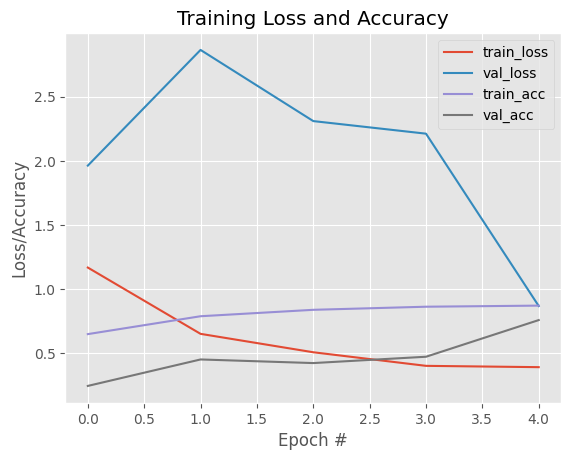

In [ ]:
# Importación de las librerías necesarias
import numpy as np
import tensorflow as tf
from keras import backend as K
from keras.layers import Conv2D
from keras.layers import Input
from keras.models import Model
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import image_dataset_from_directory
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator

# Definición de la arquitectura según el modo funcional
def deep_CNN(width, height, depth, classes, batchNorm):

  # Definimos entradas en modo "channels last"
  inputs = Input(shape=(height, width, depth)) #(X)

  # Definimos la arquitectura
  # Primer set de capas
  x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs) #(X)
  if batchNorm:
    x1 = BatchNormalization()(x1) #(X)
  x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1) #(X)
  if batchNorm:
    x1 = BatchNormalization()(x1) #(X)
  x1 = MaxPooling2D(pool_size=(2, 2))(x1) #(X)
  x1 = Dropout(0.25)(x1) #(X)

  # Segundo set de capas
  x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1) #(X)
  if batchNorm: #(X)
    x2 = BatchNormalization()(x2) #(X)
  x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2) #(X)
  if batchNorm:
    x2 = BatchNormalization()(x2) #(X)
  x2 = MaxPooling2D(pool_size=(2, 2))(x2) #(X)
  x2 = Dropout(0.25)(x2) #(X)

  # Top model
  xfc = Flatten()(x2) #(X)
  xfc = Dense(512, activation = 'relu')(xfc)
  if batchNorm:
    xfc = BatchNormalization()(xfc) #(X)
  xfc = Dropout(0.5)(xfc) #(X)
  # Clasificador softmax
  predictions = Dense(classes, activation = 'softmax')(xfc)

  # Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
  model = Model(inputs=inputs, outputs=predictions) #(X)

  # La función debe devolver el modelo como salida
  return model

# Esta función recibe un objeto de tipo dataset compuesto de imagen y etiqueta, y devuelve la imagen normalizada entre 255 y la etiqueta
def normalization(image,label):
    image = tf.cast(image/255., tf.float32)
    return image, label

# Montamos la unidad de Drive
drive.mount('/content/drive')

# Debemos leer el dataset de entrenamiento, validación y  test empleando el método image_dataset_from_directory de la librería keras.utils
# Buscad la información acerca de este método para conocer qué parámetros deben facilitarse.
# Prestad especial atención al parámetro "labels", "color_mode", "label_mode", "image_size", "batch_size", "shuffle", "validation_split", "subset", y "seed"
train_dataset = image_dataset_from_directory('/content/drive/My Drive/Pr_DeepLearning/Datos/Train/', labels="inferred", color_mode="rgba", label_mode="categorical", image_size=(32, 32), batch_size=32, shuffle=True, validation_split=0.2, subset='training', seed = 1)
validation_dataset = image_dataset_from_directory('/content/drive/My Drive/Pr_DeepLearning/Datos/Train/', labels="inferred", color_mode="rgba", label_mode="categorical", image_size=(32, 32), batch_size=32, shuffle=True, validation_split=0.2, subset='validation', seed = 1)
test_dataset = image_dataset_from_directory('/content/drive/My Drive/Pr_DeepLearning/Datos/Test/', labels="inferred", color_mode="rgba", label_mode="categorical", image_size=(32, 32), batch_size=32)

# Normalización de los dataset de entrenamiento, validación y test llamando a la función normalization
train_dataset = train_dataset.map(normalization)
validation_dataset = validation_dataset.map(normalization)
test_dataset = test_dataset.map(normalization)

# Etiquetas de las clases
labelNames = ['AR', 'CE', 'CI', 'O', 'V']

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
# Instanciamos el modelo invocando la función que hemos creado
model = deep_CNN(32, 32, 4, 5, True)
# Compilamos el modelo. Ver método Model.compile en la documentación. Emplear el optimizador SGD con un learning rate de 0.01. Entender el método de pérdidas "loss".
model.compile(optimizer=SGD(learning_rate=0.01),loss="categorical_crossentropy", metrics=['accuracy'])

# Entrenamiento de la red con 5 épocas. Ver documentación del método Model.fit.
print("[INFO]: Entrenando la red...")
H = model.fit(train_dataset, validation_data=validation_dataset, epochs=5, verbose=1)

# Almaceno el modelo en Drive
# Almacenamos el modelo empleando la función model.save de Keras
model.save("/content/drive/My Drive/Pr_DeepLearning/Modelos/deepCNN_Teledeteccion_P1.h5")

# Evaluación del modelo
# En este caso los datos de validación se encuentran en un objeto de tipo dataset compuesto de las imágenes (o variable X) y de las etiquetas (o variable Y).
# En el proceso se recorre cada una de las instancia del dataset extrayendo estos valores y almacenando únicamente las etiquetas en el array "labels".
# Asimismo, se toman los valores de las imágenes (x) y se predice su clase según el modelo entrenado. Por último, se almacena esta información en el array "predictions".
print("[INFO]: Evaluando el modelo...")
labels =  np.array([])
predictions =  np.array([])
for x, y in test_dataset:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x, verbose=0), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

#Estos dos arrays pueden finalmente emplearse para obtener el informe de la evaluación.
print(classification_report(labels, predictions, target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

**EJERCICIO 2.** En este ejercicio escribiremos un código que a partir de cada una de las imágenes de test obtenga su clase predicha y probabilidad según el modelo, su identificador de subimagen y parcela, y su clase real observada; y posteriormente escriba esta información en un fichero con el cual realizar una unión con el shapefile facilitado, y mostrar así una cartografía de los cultivos clasificados.

En este ejercicio se deberá realizar la predicción de las imágenes de test nuevamente. El motivo es que en este caso no sólo deseamos obtener la clase predicha y su probabilidad, sino que también necesitamos extraer el identificador de cada subimagen contenido en el nombre de cada fichero imagen. Por ese motivo, en este caso se realizará una iteración leyendo cada una de las imágenes (y extrayendo su nombre), y éstas se pasarán en formato array de Numpy como parámetro de entrada en el modelo para obtener su predicción. Al mismo tiempo se extraerá otro tipo de información como la clase real observada y la probabilidad de la clase predicha según el modelo. Posteriormente, esta información se almacenará en un dataframe de pandas.

Por otro lado, no hay que olvidar que las imágenes de test corresponden con subimágenes de las parcelas, y no con parcelas enteras; mientras que cada polígono del shapefile facilitado sí que corresponde con una parcela entera. Por este motivo, con el fin de asignar una única clase por parcela, será necesario agrupar los valores de salida del modelo a nivel de parcela. Para realizar este proceso existen diferentes estrategias. En este caso se agruparán todas las subimágenes de cada parcela y se extraerá la clase predicha más frecuente, y ésta será la que se asignará a nivel de parcela.

In [ ]:
from PIL import Image
import os
import pandas as pd

# Función para el cálculo del primer valor más frecuente a partir de una serie. Esto es importante en el caso de que haya más de un valor más frecuente.
def most_frequent_value(series):
    return series.mode().iloc[0]

# Directorio con las imágenes de test
path = '/content/drive/My Drive/Pr_CNN_MUIGG/Datos/Test/'

# Inicialización de los arrays donde se almacenará la información extraída de las imágenes
id_sample = np.array([])
id_parcel = np.array([])
labels =  np.array([])
predictions =  np.array([])
probabilities = np.array([])

# Recorremos cada una de las imágenes dentro de los subdirectorios del directorio con las imágenes de test
for root, dirs, files in os.walk(path):
  for name in files:
    if name.endswith('.png'):
      img_path = root+'/'+name
      # Abrimos dicha imagen
      img = Image.open(img_path)
      # Se remuestrea según el tamaño utilizado en el entrenamiento del modelo
      img = img.resize((32,32), Image.BILINEAR)
      # Se normalizan los valores como en el entrenamiento
      img = np.array(img)/255.
      # Se añade una dimensión más
      img = np.expand_dims(img, axis=0)
      # Se predice la probabilidad de pertenencia de la imagen a cada clase según el modelo entrenado
      current_prediction = model.predict(img, verbose=0)
      # Se obtiene el identificador de la clase predicha
      current_predicted_classid = np.argmax(current_prediction, axis=-1)[0]
      # Se añade el nombre de la clase predicha al array
      predictions = np.append(predictions, labelNames[current_predicted_classid])
      # Se obtiene el directorio que contiene el nombre de la clase de dicha imagen
      current_classname = os.path.basename(os.path.dirname(img_path))
      # Se añade la clase real observada al array
      labels = np.append(labels, current_classname)
      # Se calcula en porcentaje la probabilidad de la clase predicha y se añade al array
      probabilities = np.append(probabilities, np.round(np.max(current_prediction, axis=1)*100, decimals=1))
      # Se añade el nombre de la subimagen a partir del nombre del fichero al array
      id_sample = np.append(id_sample, name[:-4])
      # Se añade el nombre de la parcela al array a partir del nombre de la subimagen
      id_parcel = np.append(id_parcel, name[:-4].split("_")[0])

# Unión por columna en un mismo array de la información extraída
test_output = np.column_stack((id_sample,id_parcel,labels,predictions,probabilities))
# Conversión a pandas dataframe
df_test_output = pd.DataFrame(test_output, columns = ['Sample_id','Parcel_id','Observed','Predicted','Probability'])

# Escritura del dataframe en formato csv
df_test_output.to_csv('/content/drive/My Drive/Pr_DeepLearning/output_test_CNN1_subimage.csv', index=False)

# Agrupación a nivel de parcela de todas las subimágenes y cálculo de la clase predicha más frecuente
df_test_output_parcel = df_test_output.groupby(['Parcel_id'])['Predicted'].agg(most_frequent_value).to_frame()
# Unión de las clases predichas a nivel de parcela con las clases reales observadas para incluir esta última información
df_test_output_parcel = pd.merge(df_test_output_parcel, df_test_output[['Parcel_id', 'Observed']], on=['Parcel_id'])

# Escritura del dataframe en formato csv
df_test_output_parcel.to_csv('/content/drive/My Drive/Pr_DeepLearning/output_test_CNN1_parcel.csv', index=False)

**EJERCICIO 3.** A continuación completaremos el Ejercicio 1 empleando un modelo preentrenado. De este modo, en este ejercicio se busca entrenar y evaluar el modelo de CNN para la clasificación de tipos de cultivos empleando la técnica de fine-tuning, entrenando únicamente el último bloque (el quinto) y el top model.

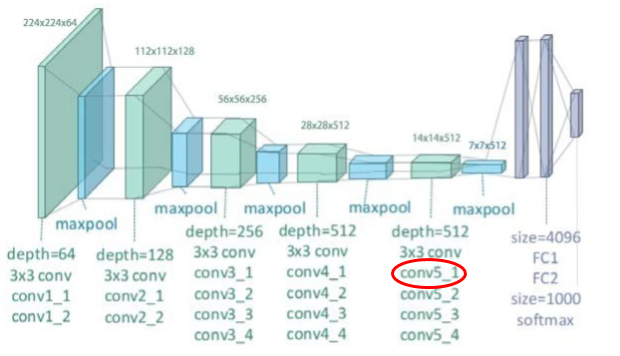

Una cosa a tener en cuenta es que normalmente los modelos preentrenados suelen trabajar con imágenes con 3 bandas (RGB), lo cual puede suponer un problema para aplicaciones como la teledetección, donde se suele trabajar con un mayor número de bandas.

Para solucionar este problema, se propone crear como primer paso en la arquitectura del modelo una convolución 2D con 3 filtros y un tamaño de kernel de 1 x 1. Esto hará que podamos emplear una imagen de entrada con 4 bandas y esta primera convolución obtenga tres imágenes resultantes (una por cada filtro), lo que se puede interpretar como una imagen resultante de tres bandas. En definitiva, este paso previo de aplicar esta convolución 2D estaría efectuando una operación similar a la de componentes principales, donde se recopila la información más destacable de las 4 bandas y se convierte a una imagen resultante de 3. De este modo, la imagen resultante ya sería apta para poder ser el input del modelo preentrenado.

Se recomienda que la implementación de la arquitectura se efectúe mediante el método secuencial. De este modo se podrá crear la primera convolución 2D con los 3 filtros, seguida del modelo preentrenado VGG16, y seguido del Flatten y el top model.

In [1]:
# import the necessary packages
import numpy as np
from keras import backend as K
from keras.layers import Conv2D
from keras.layers import Input
from keras.models import Model
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.optimizers import SGD
from keras.applications import VGG16
from keras.utils import image_dataset_from_directory
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator

# Esta función recibe un objeto de tipo dataset compuesto de imagen y etiqueta, y devuelve la imagen normalizada entre 255 y la etiqueta
def normalization(image,label):
    image = tf.cast(image/255., tf.float32)
    return image, label

# Montamos la unidad de Drive
drive.mount('/content/drive')

# Debemos leer el dataset de entrenamiento, validación y test empleando el método image_dataset_from_directory de la librería keras.utils
train_dataset = image_dataset_from_directory('/content/drive/My Drive/Pr_DeepLearning/Datos/Train/', labels="inferred", color_mode="rgba", label_mode="categorical", image_size=(32, 32), batch_size=32, shuffle=True, validation_split=0.2, subset='training', seed = 1)
validation_dataset = image_dataset_from_directory('/content/drive/My Drive/Pr_DeepLearning/Datos/Train/', labels="inferred", color_mode="rgba", label_mode="categorical", image_size=(32, 32), batch_size=32, shuffle=True, validation_split=0.2, subset='validation', seed = 1)
test_dataset = image_dataset_from_directory('/content/drive/My Drive/Pr_DeepLearning/Datos/Test/', labels="inferred", color_mode="rgba", label_mode="categorical", image_size=(32, 32), batch_size=32)

# Normalización de los dataset de entrenamiento, validación y test llamando a la función normalization
train_dataset = train_dataset.map(normalization)
validation_dataset = validation_dataset.map(normalization)
test_dataset = test_dataset.map(normalization)

# Definimos dimensiones de nuestros datos de entrada y lista con las categorias de las clases
input_shape = (32, 32, 4)
n_classes = 5
labelNames = ['AR', 'CE', 'CI', 'O', 'V']

# Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(32,32,3))
# Mostramos la arquitectura
base_model.summary()

# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
  print('capa: ', layer.name + 'congelada')

# Creamos un modelo secuencial con los siguientes pasos:
# Una primera convolución 2d que reciba los datos de entrada, 3 filtros, un tamaño de kernel de 1 x 1, strides = (1,1), y padding = 'same'
# Añadimos el modelo preentrenado, al cual hemos congelado todos los bloques convolucionales, excepto el último.
# Añadimos nuestro clasificador (top_model) con una capa oculta de 1000 neuronas y activación relu, un dropout de 0.3, otra capa oculta de 200 neuronas y activación relu, y la capa de salida con activación softmax
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(3, (1, 1),strides=(1,1),padding = 'same', activation="relu"))
model.add(base_model)
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dense(n_classes, activation='softmax', name='predictions'))

# Compilamos el modelo
model.compile(optimizer=SGD(learning_rate=0.01),loss="categorical_crossentropy", metrics=['accuracy'])

# Entrenamiento de la red con 5 épocas
print("[INFO]: Entrenando la red...")
H = model.fit(train_dataset, validation_data=validation_dataset, epochs=5, verbose=1)

# Almaceno el modelo en Drive
# Almacenamos el modelo empleando la función model.save de Keras
model.save("/content/drive/My Drive/Pr_DeepLearning/Modelos/deepCNN_Teledeteccion_P1_ejercicio3.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
labels =  np.array([])
predictions =  np.array([])
for x, y in test_dataset:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x, verbose=0), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

print(classification_report(labels, predictions, target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Mounted at /content/drive
Found 4970 files belonging to 5 classes.
Using 3976 files for training.
Found 4970 files belonging to 5 classes.
Using 994 files for validation.
Found 1500 files belonging to 5 classes.


NameError: ignored

**EJERCICIO 4.** En este Ejercicio completaremos el Ejercicio anterior aplicando Data Augmentation. De este modo, en este ejercicio se busca entrenar y evaluar el modelo de CNN para la clasificación de tipos de cultivos empleando la técnica de fine-tuning y un set de datos ampliado mediante data augmentation.

En este ejercicio deberemos tener en cuenta que para la aplicación de Data Augmentation deberemos modificar el método con el que cargamos los datos, puesto que al efectuar la carga de estos, también se aplica una modificación para aumentar el set de datos según los parámetros facilitados.

Por otro lado, cuando creemos el generador de datos mediante el método ImageDataGenerator, aplicaremos 4 parámetros:


*   Una rotación en un rango de 90º
*   Volteado horizontal
*   Volteado vertical
*   Un reescalado de los valores de los píxeles para normalizarlos dividiéndolos entre 255



In [ ]:
# import the necessary packages
import numpy as np
from keras import backend as K
from keras.layers import Conv2D
from keras.layers import Input
from keras.models import Model
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.optimizers import SGD
from keras.applications import VGG16
from keras.utils import image_dataset_from_directory
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator

# Esta función recibe un objeto de tipo dataset compuesto de imagen y etiqueta, y devuelve la imagen normalizada entre 255 y la etiqueta
def normalization(image,label):
    image = tf.cast(image/255., tf.float32)
    return image, label

# Creación del objeto ImageDataGenerator
print('Usando real-time data augmentation.')
datagen = ImageDataGenerator(
    rotation_range = 90,
    vertical_flip= True,
    horzontal_flip = True,
    rescale = 1./255,
    validation_split=0.2,
    )

# Montamos la unidad de Drive
drive.mount('/content/drive')

# Debemos leer el dataset de entrenamiento y validación empleando el método flow_from_directory a partir del objeto ImageDataGenerator
# Buscad la información acerca de este método para conocer qué parámetros deben facilitarse.
# Prestad especial atención al parámetro "target_size", "color_mode", "class_mode", "batch_size", "shuffle", "subset", y "seed"
train_dataset = datagen.flow_from_directory(directory='/content/drive/My Drive/Pr_DeepLearning/Datos/Train/',target_size=(32,32), color_mode='rgba', class_mode="categorical", batch_size=32, shuffle=True, subset='training', seed=1)
validation_dataset = datagen.flow_from_directory(directory='/content/drive/My Drive/Pr_DeepLearning/Datos/Train/',target_size=(32,32), color_mode='rgba', class_mode="categorical", batch_size=32, shuffle=True, subset='validation', seed=1)

# Debemos leer el dataset de test empleando el método image_dataset_from_directory de la librería keras.utils porque no aplicaremos data augmentation al set de test
test_dataset = image_dataset_from_directory('/content/drive/My Drive/Pr_DeepLearning/Datos/Test/', labels="inferred", color_mode="rgba", label_mode="categorical", image_size=(32, 32), batch_size=32)

# Normalización del dataset de test llamando a la función normalization
test_dataset = test_dataset.map(normalization)

# Definimos dimensiones de nuestros datos de entrada y lista con las categorias de las clases
input_shape = (32, 32, 4)
n_classes = 5
labelNames = ['AR', 'CE', 'CI', 'O', 'V']

# Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(32,32,3))
# Mostramos la arquitectura
base_model.summary() #(X)

# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
  print('capa: ', layer.name + 'congelada')

# Creamos un modelo secuencial con los siguientes pasos:
# Una primera convolución 2d que reciba los datos de entrada, 3 filtros, un tamaño de kernel de 1 x 1, strides = (1,1), y padding = 'same'
# Añadimos el modelo preentrenado, al cual hemos congelado todos los bloques convolucionales, excepto el último.
# Añadimos nuestro clasificador (top_model)
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(3, (1, 1),strides=(1,1),padding = 'same', activation="relu"))
model.add(base_model)
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dense(n_classes, activation='softmax', name='predictions'))

# Compilamos el modelo
model.compile(optimizer=SGD(learning_rate=0.01),loss="categorical_crossentropy", metrics=['accuracy'])

# Entrenamiento de la red con 5 épocas
print("[INFO]: Entrenando la red...")
H = model.fit(train_dataset, validation_data=validation_dataset, epochs=5, verbose=1)

# Almaceno el modelo en Drive
# Almacenamos el modelo empleando la función model.save de Keras
model.save("/content/drive/My Drive/Pr_DeepLearning/Modelos/deepCNN_Teledeteccion_P1_ejercicio3.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
labels =  np.array([])
predictions =  np.array([])
for x, y in test_dataset:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x, verbose=0), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

print(classification_report(labels, predictions, target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()